<a href="https://colab.research.google.com/github/Amaro-Alvial-Student/GRD_Prediction/blob/main/PrediccionDelGRD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparar los datos y dar formato al DataSet

Importacion de librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Embedding, Flatten, Concatenate, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

Utilizamos la librería pandas como herramienta principal debido a nuestra experiencia previa con ella. Además, nos permite visualizar y manipular los datos de manera confiable y eficiente.

In [2]:
df = pd.read_csv('dataset_elpino.csv', sep=';')
df.head()

,Diag 01 Principal (cod+des),Diag 02 Secundario (cod+des),Diag 03 Secundario (cod+des),Diag 04 Secundario (cod+des),Diag 05 Secundario (cod+des),Diag 06 Secundario (cod+des),Diag 07 Secundario (cod+des),Diag 08 Secundario (cod+des),Diag 09 Secundario (cod+des),Diag 10 Secundario (cod+des),...,Proced 24 Secundario (cod+des),Proced 25 Secundario (cod+des),Proced 26 Secundario (cod+des),Proced 27 Secundario (cod+des),Proced 28 Secundario (cod+des),Proced 29 Secundario (cod+des),Proced 30 Secundario (cod+des),Edad en años,Sexo (Desc),GRD
0,A41.8 - Otras septicemias especificadas,B37.6 - Endocarditis debida a candida (I39.8*),"I39.8 - Endocarditis, válvula no especificada,...",N10 - Nefritis tubulointersticial aguda,B96.1 - Klebsiella pneumoniae [K. pneumoniae] ...,L89.9 - Úlcera de decúbito y area de presión n...,L08.9 - Infección local de la piel y del tejid...,B96.2 - Escherichia coli [E. coli] como causa ...,A41.5 - Sepsis por otros organnismos Gram nega...,J86.9 - Piotórax sin fístula,...,99.84 - AISLAMIENTO,88.72 - ECOCARDIOGRAFIA,90.42 - EXAMEN MICROSCOPICO RESPIRATORIO.CULTIVO,90.52 - EXAMEN MICROSCOPICO SANGRE.CULTIVO,91.39 - EXAMEN MICROSCOPICO URINARIO INFERIOR....,91.33 - EXAMEN MICROSCOPICO URINARIO INFERIOR....,87.03 - TOMOGRAFIA AXIAL COMPUTERIZADA CABEZA,40,Hombre,184103 - MH SEPTICEMIA W/MCC
1,"U07.1 - COVID-19, virus identificado",J12.8 - Neumonía debida a otros virus,R06.0 - Disnea,R05 - Tos,"R50.9 - Fiebre, no especificada",Z29.0 - Aislamiento,Z01.7 - Examen de laboratorio,"J96.00 - Insuficiencia respiratoria aguda, Tip...",J94.2 - Hemotórax,J92.9 - Paquipleuritis sin asbestosis,...,91.62 - EXAMEN MICROSCOPICO PIEL.CULTIVO,90.43 - EXAMEN MICROSCOPICO RESPIRATORIO.CULTI...,91.39 - EXAMEN MICROSCOPICO URINARIO INFERIOR....,90.52 - EXAMEN MICROSCOPICO SANGRE.CULTIVO,91.32 - EXAMEN MICROSCOPICO URINARIO INFERIOR....,96.59 - IRRIGACION HERIDA OTRA,90.99 - EXAMEN MICROSCOPICO DIGESTIVO INFERIOR...,53,Hombre,041013 - PH ECMO VENTILACIÓN MECÁNICA PROLONGA...
2,K56.5 - Adherencias [bridas] intestinales con ...,R57.2 - Shock séptico,R57.1 - Choque hipovolémico,J80 - Síndrome de dificultad respiratoria del ...,Y95 - Afección nosocomial,J15.0 - Neumonía debida a Klebsiella pneumoniae,U82.2 - Resistencia a Betalactamasas de amplio...,B95.6 - Staphylococcus aureus como causa de en...,B96.8 - Otros agentes bacterianos especificado...,B37.1 - Candidiasis pulmonar,...,99.84 - AISLAMIENTO,91.73 - EXAMEN MICROSCOPICO HERIDA OPERATORIA....,90.53 - EXAMEN MICROSCOPICO SANGRE.CULTIVO Y S...,99.26 - INYECCION TRANQUILIZANTE,89.39 - OTRAS MEDICIONES Y EXAMENES NO QUIRURG...,89.66 - GASOMETRIA VENA,89.65 - GASOMETRIA ARTERIA,65,Hombre,041013 - PH ECMO VENTILACIÓN MECÁNICA PROLONGA...
3,K76.8 - Otras enfermedades especificadas del h...,K66.1 - Hemoperitoneo,"N18.5 - Enfermedad renal crónica, estadio 5",D64.9 - Anemia de tipo no especificado,E87.5 - Hiperpotasemia,E87.2 - Acidosis,J81 - Edema pulmonar,N17.8 - Otras insuficiencias renales agudas,J44.9 - Enfermedad pulmonar obstructiva crónic...,R41.0 - Desorientación no especificada,...,57.94 - SONDAJE URINARIO PERMANENTE,00.13 - INYECCION NESIRITIDE,00.17 - INFUSON AGENTE VASOPRESOR,99.04 - TRANSFUSION CONCENTRADO HEMATIES,99.18 - INYECCION ELECTROLITO,99.21 - INYECCION ANTIBIOTICO,99.23 - INYECCION ESTEROIDE,61,Hombre,041023 - PH VENTILACIÓN MECÁNICA PROLONGADA SI...
4,T81.0 - Hemorragia y hematoma que complican un...,"Y83.2 - Operación quirúrgica con anastomosis, ...",S31.1 - Herida de la pared abdominal,S36.80 - Traumatismo de otros órganos intraabd...,W31.62 - Contacto traumático con otras maquina...,"J96.09 - Insuficiencia respiratoria aguda, Tip...",J15.0 - Neumonía debida a Klebsiella pneumoniae,U82.2 - Resistencia a Betalactamasas de amplio...,"U07.1 - COVID-19, virus identificado","N39.0 - Infección de vías urinarias, sitio no ...",...,90.52 - EXAMEN MICROSCOPICO SANGRE.CULTIVO,91.39 - EXAMEN MICROSCOPICO URINARIO INFERIOR....,91.32 - EXAMEN MICROSCOPICO URINARIO INFERIOR....,93.

Formato del archivo "dataset_elpino.csv":
* Primera columna es el diagnostico principal.
* Desde la columna 2 a la 35 son diagnosticos secundarios.
* Columna 36 es el procedimiento principal.
* Desde la columna 37 a la 65 son procedimientos secundarios.
* Columna 66 contiene la edad en años.
* Columna 67 contiene el sexo.
* Columna 68 contiene el GRD (objetivo)
* El formato de los diagnosticos, procedimientos y GRD está dado por: Código - Descripción.

-Al explorar el dataset, observamos que los diagnósticos vienen acompañados de una descripción. Si bien esta información es útil para comprender los códigos, también dificulta el manejo automatizado del dataset.

-Identificamos como variable objetivo la columna "GRD", que será nuestra variable target.

-Para mejorar la estructura del dataset, decidimos eliminar las descripciones de los diagnósticos, manteniendo únicamente el código. Así, conservamos la misma cantidad de información en un formato más concreto y manejable.

-También queremos estandarizar el formato de los nombres de las variables. Por ejemplo, transformaremos nombres como "Diag 01 Principal (cod+des)" a "Diag01".

-Para ello, abrimos el dataset utilizando funciones nativas de Python y separamos los nombres de las columnas, almacenándolos en una variable llamada header.

In [3]:
archivo=open("dataset_elpino.csv",encoding="utf-8")
header=archivo.readline().strip().split(";")

In [4]:
corpus=[]
target=[]
edad=[]
sexo=[]
severidad=[]
features=[]

Una vez extraídos los nombres, los reorganizamos y limpiamos, generando una nueva lista de nombres simplificados que se almacena en la variable features.

In [5]:
for col in header:
    # col=col.split("-")[0].strip()   Linea que fuertemente parece sobrante
    if col.startswith("Diag") or col.startswith("Proc"):
        col=col.split(" ")
        col=col[0]+col[1]
    features.append(col)

print(features)

['Diag01', 'Diag02', 'Diag03', 'Diag04', 'Diag05', 'Diag06', 'Diag07', 'Diag08', 'Diag09', 'Diag10', 'Diag11', 'Diag12', 'Diag13', 'Diag14', 'Diag15', 'Diag16', 'Diag17', 'Diag18', 'Diag19', 'Diag20', 'Diag21', 'Diag22', 'Diag23', 'Diag24', 'Diag25', 'Diag26', 'Diag27', 'Diag28', 'Diag29', 'Diag30', 'Diag31', 'Diag32', 'Diag33', 'Diag34', 'Diag35', 'Proced01', 'Proced02', 'Proced03', 'Proced04', 'Proced05', 'Proced06', 'Proced07', 'Proced08', 'Proced09', 'Proced10', 'Proced11', 'Proced12', 'Proced13', 'Proced14', 'Proced15', 'Proced16', 'Proced17', 'Proced18', 'Proced19', 'Proced20', 'Proced21', 'Proced22', 'Proced23', 'Proced24', 'Proced25', 'Proced26', 'Proced27', 'Proced28', 'Proced29', 'Proced30', 'Edad en años', 'Sexo (Desc)', 'GRD']


Finalmente, con las variables renombradas y la estructura optimizada, procedemos a separar los datos en sus respectivas variables, manteniendo el orden original del dataset.

In [6]:
for linea in archivo:
    row=[]
    linea=linea.strip().split(";")
    for i in range(len(linea)):
        col=linea[i].split("-")[0].strip()
        if i==67:
            # grd=col
            # target.append(grd[-1])
            target.append(col)
        elif i==66:
          #Se transformará la columna categorica del sexo, en binario, con mujer como 1 y hombre como 0
            sexo.append(1 if col=="Mujer" else 0)
        elif i==65:
            edad.append(int(col))
        else:
            row.append(col)
    corpus.append(row)

Ahora con la información de las columnas extraida en forma de arreglos, tenemos el siguiente formato:

Los diagnosticos y procedimientos realizados al paciente i se encuentran en el $corpus[i]$, además su edad, sexo y GRD se encuentran en $edad[i]$, $sexo[i]$ y $target[i]$, respectivamente.

In [7]:
print(features)
print(f"{corpus[0]} {edad[0]} {sexo[0]} {target[0]}")

['Diag01', 'Diag02', 'Diag03', 'Diag04', 'Diag05', 'Diag06', 'Diag07', 'Diag08', 'Diag09', 'Diag10', 'Diag11', 'Diag12', 'Diag13', 'Diag14', 'Diag15', 'Diag16', 'Diag17', 'Diag18', 'Diag19', 'Diag20', 'Diag21', 'Diag22', 'Diag23', 'Diag24', 'Diag25', 'Diag26', 'Diag27', 'Diag28', 'Diag29', 'Diag30', 'Diag31', 'Diag32', 'Diag33', 'Diag34', 'Diag35', 'Proced01', 'Proced02', 'Proced03', 'Proced04', 'Proced05', 'Proced06', 'Proced07', 'Proced08', 'Proced09', 'Proced10', 'Proced11', 'Proced12', 'Proced13', 'Proced14', 'Proced15', 'Proced16', 'Proced17', 'Proced18', 'Proced19', 'Proced20', 'Proced21', 'Proced22', 'Proced23', 'Proced24', 'Proced25', 'Proced26', 'Proced27', 'Proced28', 'Proced29', 'Proced30', 'Edad en años', 'Sexo (Desc)', 'GRD']
['A41.8', 'B37.6', 'I39.8', 'N10', 'B96.1', 'L89.9', 'L08.9', 'B96.2', 'A41.5', 'J86.9', 'U07.1', 'Y95', 'N18.5', 'E87.1', 'D64.9', 'G82.2', 'N31.9', 'I10', 'K70.4', 'F19.2', 'F10.2', 'E46', 'G40.9', 'L21.9', 'Z93.5', 'Z93.3', 'Z99.2', 'Z91.6', '', ''

Dado que tenemos nuestros datos correctamente ordenados, es momento de crear un DataFrame con Pandas.

In [8]:
datos = list(zip(corpus, edad, sexo, target))
columnas = ['corpus', 'Age', 'Gender', 'Target']
df = pd.DataFrame(datos, columns=columnas)
df.head()

,corpus,Age,Gender,Target
0,"[A41.8, B37.6, I39.8, N10, B96.1, L89.9, L08.9...",40,0,184103
1,"[U07.1, J12.8, R06.0, R05, R50.9, Z29.0, Z01.7...",53,0,041013
2,"[K56.5, R57.2, R57.1, J80, Y95, J15.0, U82.2, ...",65,0,041013
3,"[K76.8, K66.1, N18.5, D64.9, E87.5, E87.2, J81...",61,0,041023
4,"[T81.0, Y83.2, S31.1, S36.80, W31.62, J96.09, ...",30,0,041023


Al ver que la estructura del data set no es la esperada sebemos hacer mas modificaciones para que este en el formato esperado.

In [9]:
df[features[:len(corpus[0])]] = pd.DataFrame(df.corpus.values.tolist(), index= df.index)
df = df.drop('corpus', axis=1)
columnasOrdenadas = features[:len(corpus[0])] + ['Age', 'Gender', 'Target']
df = df[columnasOrdenadas]
df.head()

,Diag01,Diag02,Diag03,Diag04,Diag05,Diag06,Diag07,Diag08,Diag09,Diag10,...,Proced24,Proced25,Proced26,Proced27,Proced28,Proced29,Proced30,Age,Gender,Target
0,A41.8,B37.6,I39.8,N10,B96.1,L89.9,L08.9,B96.2,A41.5,J86.9,...,99.84,88.72,90.42,90.52,91.39,91.33,87.03,40,0,184103
1,U07.1,J12.8,R06.0,R05,R50.9,Z29.0,Z01.7,J96.00,J94.2,J92.9,...,91.62,90.43,91.39,90.52,91.32,96.59,90.99,53,0,041013
2,K56.5,R57.2,R57.1,J80,Y95,J15.0,U82.2,B95.6,B96.8,B37.1,...,99.84,91.73,90.53,99.26,89.39,89.66,89.65,65,0,041013
3,K76.8,K66.1,N18.5,D64.9,E87.5,E87.2,J81,N17.8,J44.9,R41.0,...,57.94,00.13,00.17,99.04,99.18,99.21,99.23,61,0,041023
4,T81.0,Y83.2,S31.1,S36.80,W31.62,J96.09,J15.0,U82.2,U07.1,N39.0,...,90.52,91.39,91.32,93.90,99.15,96.59,45.13,30,0,041023


# Analisis de Datos

Se realiza un analisis superficial del data frame

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14561 entries, 0 to 14560
Data columns (total 68 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Diag01    14561 non-null  object
 1   Diag02    14561 non-null  object
 2   Diag03    14561 non-null  object
 3   Diag04    14561 non-null  object
 4   Diag05    14561 non-null  object
 5   Diag06    14561 non-null  object
 6   Diag07    14561 non-null  object
 7   Diag08    14561 non-null  object
 8   Diag09    14561 non-null  object
 9   Diag10    14561 non-null  object
 10  Diag11    14561 non-null  object
 11  Diag12    14561 non-null  object
 12  Diag13    14561 non-null  object
 13  Diag14    14561 non-null  object
 14  Diag15    14561 non-null  object
 15  Diag16    14561 non-null  object
 16  Diag17    14561 non-null  object
 17  Diag18    14561 non-null  object
 18  Diag19    14561 non-null  object
 19  Diag20    14561 non-null  object
 20  Diag21    14561 non-null  object
 21  Diag22    14

Se revisan las columnas que forman parte del df, incluyendo sus formatos

In [11]:
df.head()

,Diag01,Diag02,Diag03,Diag04,Diag05,Diag06,Diag07,Diag08,Diag09,Diag10,...,Proced24,Proced25,Proced26,Proced27,Proced28,Proced29,Proced30,Age,Gender,Target
0,A41.8,B37.6,I39.8,N10,B96.1,L89.9,L08.9,B96.2,A41.5,J86.9,...,99.84,88.72,90.42,90.52,91.39,91.33,87.03,40,0,184103
1,U07.1,J12.8,R06.0,R05,R50.9,Z29.0,Z01.7,J96.00,J94.2,J92.9,...,91.62,90.43,91.39,90.52,91.32,96.59,90.99,53,0,041013
2,K56.5,R57.2,R57.1,J80,Y95,J15.0,U82.2,B95.6,B96.8,B37.1,...,99.84,91.73,90.53,99.26,89.39,89.66,89.65,65,0,041013
3,K76.8,K66.1,N18.5,D64.9,E87.5,E87.2,J81,N17.8,J44.9,R41.0,...,57.94,00.13,00.17,99.04,99.18,99.21,99.23,61,0,041023
4,T81.0,Y83.2,S31.1,S36.80,W31.62,J96.09,J15.0,U82.2,U07.1,N39.0,...,90.52,91.39,91.32,93.90,99.15,96.59,45.13,30,0,041023


Revisamos las metricas estadisticas base para las vairables númericas

In [12]:
df.describe()

,Age,Gender
count,14561.000000,14561.000000
mean,39.426550,0.660463
std,24.681545,0.473568
min,0.000000,0.000000
25%,23.000000,0.000000
50%,36.000000,1.000000
75%,60.000000,1.000000
max,121.000000,1.000000


Eliminar el caso de la edad de 121 años

In [13]:
df = df[df['Age'] != 121]

Datos nulos por columna

In [14]:
df.isnull().sum()

,0
Diag01,0
Diag02,0
Diag03,0
Diag04,0
Diag05,0
...,...
Proced29,0
Proced30,0
Age,0
Gender,0


In [15]:
df["Target"].value_counts()[:10]

,count
Target,
146101,813
146121,639
146131,538
158171,389
134161,325
071141,317
044153,287
061131,252
041023,248


In [16]:
df["Age"].value_counts()[:10] #los infantes son quienes sufren mas enfermedades

,count
Age,
0,1395
27,344
29,327
30,311
31,308
28,303
24,300
23,293
26,290


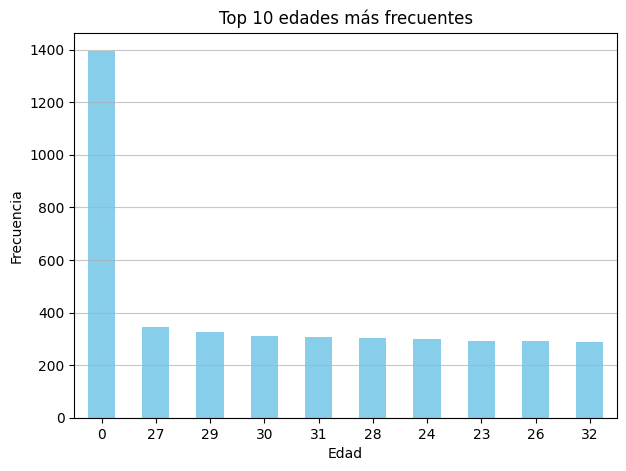

In [17]:
edades_top = df["Age"].value_counts().head(10)

plt.figure(figsize=(7, 5))
edades_top.plot(kind='bar', color='skyblue')
plt.title("Top 10 edades más frecuentes")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.7)
plt.show()

In [18]:
df[df["Age"]<10]["Age"].value_counts()

,count
Age,
0,1395
1,240
2,151
3,109
4,59
5,46
7,39
9,28
6,26


In [19]:
df["Gender"].value_counts()[:10] #Tenemos un desbalanceo de clases. Será relevante?

,count
Gender,
1,9616
0,4944


In [20]:
df[["Target", "Age"]].value_counts()[:10] # Desde el 113 en adelante son Grds con menos de 30 casos cada uno

Target  Age
158171  0      389
044183  0       96
146101  29      69
        31      62
044213  0       61
158131  0       61
146101  30      59
044163  0       56
146121  23      50
146101  24      45
Name: count, dtype: int64

Contar GRD con menos de 5 recurrencias

In [21]:
int((df['Target'].value_counts() < 5).sum())

199

Matriz de correlación en variables categoricas

Creación de Data frame que se modificará para poder mostrar la matriz de correlación. "newDF"

In [22]:
newDf = df

In [23]:
newDf.head()

,Diag01,Diag02,Diag03,Diag04,Diag05,Diag06,Diag07,Diag08,Diag09,Diag10,...,Proced24,Proced25,Proced26,Proced27,Proced28,Proced29,Proced30,Age,Gender,Target
0,A41.8,B37.6,I39.8,N10,B96.1,L89.9,L08.9,B96.2,A41.5,J86.9,...,99.84,88.72,90.42,90.52,91.39,91.33,87.03,40,0,184103
1,U07.1,J12.8,R06.0,R05,R50.9,Z29.0,Z01.7,J96.00,J94.2,J92.9,...,91.62,90.43,91.39,90.52,91.32,96.59,90.99,53,0,041013
2,K56.5,R57.2,R57.1,J80,Y95,J15.0,U82.2,B95.6,B96.8,B37.1,...,99.84,91.73,90.53,99.26,89.39,89.66,89.65,65,0,041013
3,K76.8,K66.1,N18.5,D64.9,E87.5,E87.2,J81,N17.8,J44.9,R41.0,...,57.94,00.13,00.17,99.04,99.18,99.21,99.23,61,0,041023
4,T81.0,Y83.2,S31.1,S36.80,W31.62,J96.09,J15.0,U82.2,U07.1,N39.0,...,90.52,91.39,91.32,93.90,99.15,96.59,45.13,30,0,041023


Definición del V de Cramer

In [24]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


Crear intervalos de edad (para tener edad como vairable categorica)

In [25]:
bins = list(range(0, newDf['Age'].max() + 3, 3))  # Intervalos de 3 años
labels = [f'{i}-{i+3}' for i in bins[:-1]]
newDf['Age_Bins'] = pd.cut(newDf['Age'], bins=bins, labels=labels, right=False)

Calcular V de Cramer

In [26]:
categorical_cols = newDf.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols.append('Age_Bins')

In [27]:
newDf["Age_Bins"].value_counts()

,count
Age_Bins,
0-3,1786
27-30,974
30-33,906
24-27,835
33-36,776
21-24,761
36-39,623
39-42,603
63-66,545


Crear Matriz de correlación de variables categoricas

In [28]:
corr_matrix = pd.DataFrame(np.zeros((len(categorical_cols), len(categorical_cols))),
                      index=categorical_cols, columns=categorical_cols)

for col1 in categorical_cols:
    for col2 in categorical_cols:
        corr_matrix.loc[col1, col2] = cramers_v(newDf[col1], newDf[col2])


Eliminar duplicados

In [29]:
categorical_cols = list(set(categorical_cols))

Calcular v de Cramer ordenada para evaluar con respecto al "Target"

In [30]:
cramers_results = {}
for col in categorical_cols:
    if col != 'Target':  # Evitar comparar Target consigo mismo
        cramers_results[col] = cramers_v(newDf[col], newDf['Target'])

cramers_sorted = pd.Series(cramers_results).sort_values(ascending=False)
print("Variables más asociadas al Target:")
print(cramers_sorted)

Variables más asociadas al Target:
Diag01      0.594609
Diag02      0.365180
Proced01    0.357485
Diag03      0.296800
Diag04      0.251405
              ...   
Diag34      0.000000
Diag22      0.000000
Diag25      0.000000
Diag29      0.000000
Diag27      0.000000
Length: 66, dtype: float64


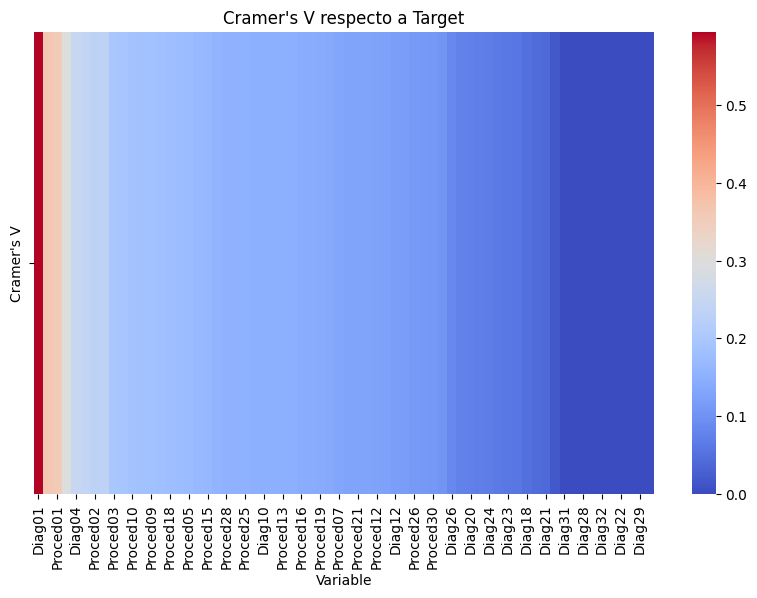

In [31]:
cramers_df = pd.DataFrame(cramers_results.items(), columns=["Variable", "Cramer's V"])
#ordernar cramers_df
cramers_df = cramers_df.sort_values(by="Cramer's V", ascending=False)

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cramers_df.set_index('Variable').T, cmap='coolwarm')
plt.title("Cramer's V respecto a Target")
plt.show()

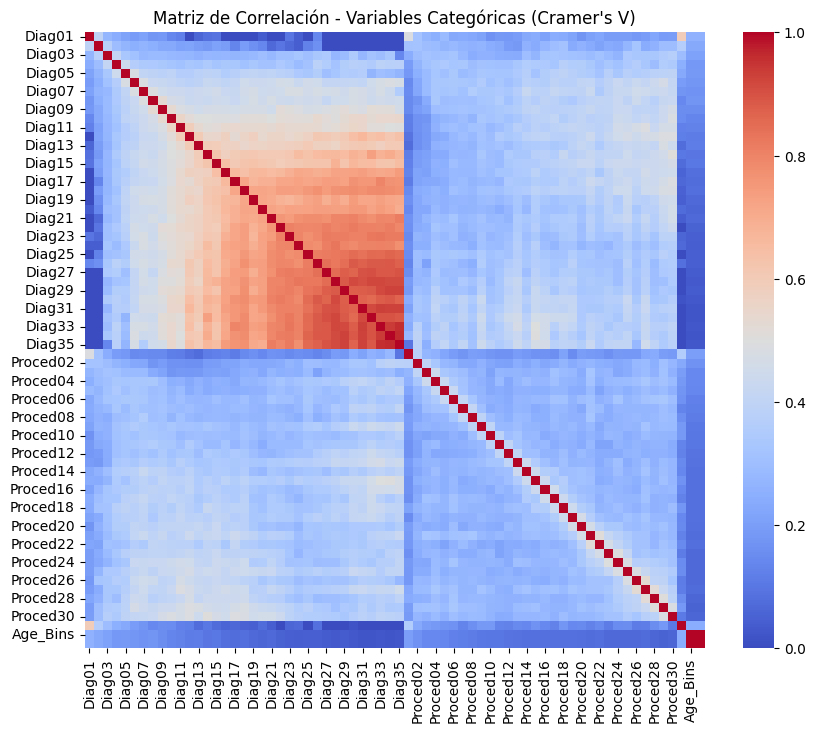

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap="coolwarm", vmin=0, vmax=1)
plt.title('Matriz de Correlación - Variables Categóricas (Cramer\'s V)')
plt.show()


Las 23 variables más relacionadas con el GRD

In [33]:
cramers_df.head(23)

,Variable,Cramer's V
2,Diag01,0.594609
51,Diag02,0.365180
62,Proced01,0.357485
52,Diag03,0.296800
50,Diag04,0.251405
21,Age_Bins,0.242236
16,Proced02,0.232933
29,Diag05,0.232655
23,Proced03,0.197033
12,Diag06,0.193615


Tomaremos en cuenta solos las columnas que se relaciones al menos un 20% con nuestro target y que además no se relacionen entre sí por más de un 70%

In [34]:
columnas = []
for i in range(len(newDf.columns)):
  for j in range(len(newDf.columns)):
    if (cramers_v(newDf[newDf.columns[i]], newDf[newDf.columns[-2]])>=0.2): #df[df-columns[-2]] el infice "-2" corresponde al target
      if (cramers_v(newDf[newDf.columns[i]], newDf[newDf.columns[j]])<=0.7):
        if(newDf.columns[i] not in columnas):
          columnas.append(newDf.columns[i])

In [35]:
columnas2 = columnas[:-1]

In [36]:
print(columnas2)

['Diag01', 'Diag02', 'Diag03', 'Diag04', 'Diag05', 'Proced01', 'Proced02', 'Gender', 'Target']


# Probando modelos

Se creará un data frame filtrado, donde se eliminarán los casos de GRD con menos de 2 casos.

In [37]:
df_filtered = df[df['Target'].isin(df['Target'].value_counts()[df['Target'].value_counts() >= 2].index)]
x = df_filtered[columnas2]
y = df_filtered['Target']

## Ordinal Encoder - Arbol de decisión

Se divide el data set en 70/30

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

Se utiliza Ordinal Encoder

In [39]:
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)


In [40]:
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

Se predicen datos para poder calcular sus metricas de evaluación

In [41]:
y_pred = model.predict(x_test)

Se calculan accuracy, precision, recall y f1_score

In [42]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Se muestran las metricas obtenidas en el módelo

In [43]:
print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1-Score: {f1}")

Accuracy: 0.9383341003221353
Precision: 0.7615214863399908
Recall: 0.7582756666379412
F1-Score: 0.7466950800470383


## One hot encoding - Regresión Logística

Se divide el data set en 70/30

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

Se utiliza el One Hot Encoding

In [45]:
one_hot = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', one_hot, columnas2)
    ],
)
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('LogisticRegression', LogisticRegression(max_iter=1000, class_weight='balanced')) # class_weight='balanced' debido al tamaño disparejo de las clases
])

Se ajusta el modelo

In [46]:
model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Diag01', 'Diag02', 'Diag03',
                                                   'Diag04', 'Diag05',
                                                   'Proced01', 'Proced02',
                                                   'Gender', 'Target'])])),
                ('LogisticRegression',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

Se predicen datos para poder calcular sus metricas de evaluación

In [47]:
y_pred = model.predict(x_test)

Se calculan accuracy, precision, recall y f1_score

In [48]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Se muestran las metricas obtenidas en el módelo

In [49]:
print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1-Score: {f1}")

Accuracy: 0.9815922687528762
Precision: 0.8150082546483237
Recall: 0.8463174603174604
F1-Score: 0.8252299105880396


## One Hot Encoding - Regresión Logística - SMOTE

Dividir data set en 70/30

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

Se filtra el data set, eliminando todas las clases ('target') que tengan una frecuencia menor a 5 dentro del data frame.

In [51]:
counter = Counter(y_train)
to_remove = [cls for cls, count in counter.items() if count < 5]

mask = ~pd.Series(y_train).isin(to_remove)

x_train_filtered = x_train[mask]
y_train_filtered = y_train[mask]

One Hot Encoding + SMOTE con Pipeline

In [52]:
one_hot = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', one_hot, columnas2)
    ],
)
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42, k_neighbors=1)),
    ('LogisticRegression', LogisticRegression(max_iter=1000))
])
pipeline.fit(x_train_filtered, y_train_filtered)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Diag01', 'Diag02', 'Diag03',
                                                   'Diag04', 'Diag05',
                                                   'Proced01', 'Proced02',
                                                   'Gender', 'Target'])])),
                ('smote', SMOTE(k_neighbors=1, random_state=42)),
                ('LogisticRegression', LogisticRegression(max_iter=1000))])

Predecir valores para calcular metricas de evaluación

In [53]:
y_pred = pipeline.predict(x_test)

Calcular accuracy, precision, recall y f1_score

In [54]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Se muestran las metricas obtenidas en el módelo

In [55]:
print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1-Score: {f1}")

Accuracy: 0.95651173492867
Precision: 0.5759832180444968
Recall: 0.6317208419599724
F1-Score: 0.5975935604609566


## One Hot Encoding - Perceptrón Multicapa

Utilizamos OneHotEncoder debido a las variables categoricas

In [56]:
one_hot = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', one_hot, columnas2)
    ],
)
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('mlp', MLPClassifier(hidden_layer_sizes=(200,), max_iter=1000, random_state=42))
])
model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Diag01', 'Diag02', 'Diag03',
                                                   'Diag04', 'Diag05',
                                                   'Proced01', 'Proced02',
                                                   'Gender', 'Target'])])),
                ('mlp',
                 MLPClassifier(hidden_layer_sizes=(200,), max_iter=1000,
                               random_state=42))])

Predecir valores para calcular metricas de evaluación

In [57]:
y_pred = model.predict(x_test)

Calcular accuracy, precision, recall y f1_score

In [58]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Se muestran las metricas obtenidas en el módelo

In [59]:
print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1-Score: {f1}")

Accuracy: 0.9878048780487805
Precision: 0.8802165175371945
Recall: 0.8945171382562687
F1-Score: 0.8850995306409103


**1 capa de 100 neuronas** \
Accuracy: 0.6886792452830188 \
Precision: 0.3830527113392016 \
Recall: 0.36567080105460215 \
F1-Score: 0.36140467914573315 \

****

**1 capa de 200 neuronas** \
Accuracy: 0.6937413713759779 \
Precision: 0.38646395202836364 \
Recall: 0.36928341641348095 \
F1-Score: 0.36599198495158514 \

****

**1 capa de 100 neuronas y otra de 200** \
Accuracy: 0.6780947998159227 \
Precision: 0.35770782592277517 \
Recall: 0.3367728023230377 \
F1-Score: 0.33447887131762344\

****
**Modelo Nuevo (20% de correlación)** \
**1 capa de 200 neuronas**

Accuracy: 0.9878048780487805 \
Precision: 0.8802165175371945 \
Recall: 0.8945171382562687 \
F1-Score: 0.8850995306409103

## Label Encoder - Red neuronal + Embeddings

In [60]:
semilla=42

Creamos una copia del data frame para no modificar el df

In [61]:
x = df_filtered[columnas2].copy()

Codificar variables categoricas con Label Encoding (LE)

In [62]:
for col in columnas2:
    le = LabelEncoder()
    x[col] = le.fit_transform(x[col])

# Codificar (el Target)
label_encoder_y = LabelEncoder()
y = label_encoder_y.fit_transform(df_filtered["Target"])

Dividir el data set con relación 70/30 para realizar las pruebas y el entrenamiento

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=semilla)

Se realiza utiliza el embedding

In [64]:
input_layers = []
embedding_layers = []

# Se obtiene el input_dim (cantidad de categorías únicas por columna)
embedding_dims = {col: x[col].nunique() for col in columnas2}

for col in columnas2:
    input_layer = Input(shape=(1,), name=col)
    input_layers.append(input_layer)

    embedding_layer = Embedding(
        input_dim=embedding_dims[col],
        output_dim=10,  # Modificable
        name=f"{col}_embed"
    )(input_layer)

    embedding_layer = Flatten()(embedding_layer)
    embedding_layers.append(embedding_layer)


Se crea el modelo functional con Keras, especificamente de 3 capas ocultas, con 256, 128 y 65 neuronas respectivamente, todas estas utilizando la activación "relu" y con una capa de salida utilizando la activación "softmax" debido a ser un target categorico multiclase (con muchas clases).

In [65]:
x_concat = Concatenate()(embedding_layers)
x_dense = Dense(256, activation='relu')(x_concat)
x_dense = Dropout(0.5)(x_dense)
x_dense = Dense(128, activation='relu')(x_dense)
x_dense = Dropout(0.5)(x_dense)
x_dense = Dense(64, activation='relu')(x_dense)
output = Dense(len(label_encoder_y.classes_), activation='softmax')(x_dense)

model = Model(inputs=input_layers, outputs=output)
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Se preparan los inputs (entradas) como listas

In [66]:
x_train_list = [x_train[col].values for col in columnas2]
x_test_list = [x_test[col].values for col in columnas2]

Finalmente, se entrena el modelo

In [67]:
model.fit(x_train_list, y_train, epochs=50, batch_size=32, validation_data=(x_test_list, y_test)) #Revisar bien

Epoch 1/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.0760 - loss: 5.1465 - val_accuracy: 0.3208 - val_loss: 3.1737
Epoch 2/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3387 - loss: 2.9880 - val_accuracy: 0.5992 - val_loss: 1.9618
Epoch 3/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5447 - loss: 2.0059 - val_accuracy: 0.7271 - val_loss: 1.4234
Epoch 4/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6424 - loss: 1.5699 - val_accuracy: 0.8060 - val_loss: 1.1080
Epoch 5/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7045 - loss: 1.2601 - val_accuracy: 0.8405 - val_loss: 0.9294
Epoch 6/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7500 - loss: 1.0454 - val_accuracy: 0.8698 - val_loss: 0.7796
Epoch 7/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7774 - loss: 0.8960 - val_accuracy: 0.8896 - val_loss: 0.6874
Epoch 8/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7997 - loss: 0.7876 - val_accuracy: 0.

Ahora se prueba el modelo con el fin de evaluar su desempeño

In [68]:
# Obtener las probabilidades de predicción
y_pred_probs = model.predict(x_test_list)

# Convertir a clases predichas
y_pred = np.argmax(y_pred_probs, axis=1)

136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


Calcular accuracy, precision, recall y f1_score

In [69]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

Se muestran las metricas obtenidas en el módelo

In [70]:
print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1-Score: {f1}")

Accuracy: 0.9905660377358491
Precision: 0.9165108446221039
Recall: 0.933256745736269
F1-Score: 0.9200521152355923


Curva ROC/AUC del modelo

In [71]:
from sklearn.preprocessing import label_binarize

# One-hot encode de las clases verdaderas
y_test_bin = label_binarize(y_test, classes=range(len(label_encoder_y.classes_)))


In [72]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle

# Número de clases
n_classes = y_test_bin.shape[1]

# Curvas ROC y AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ran

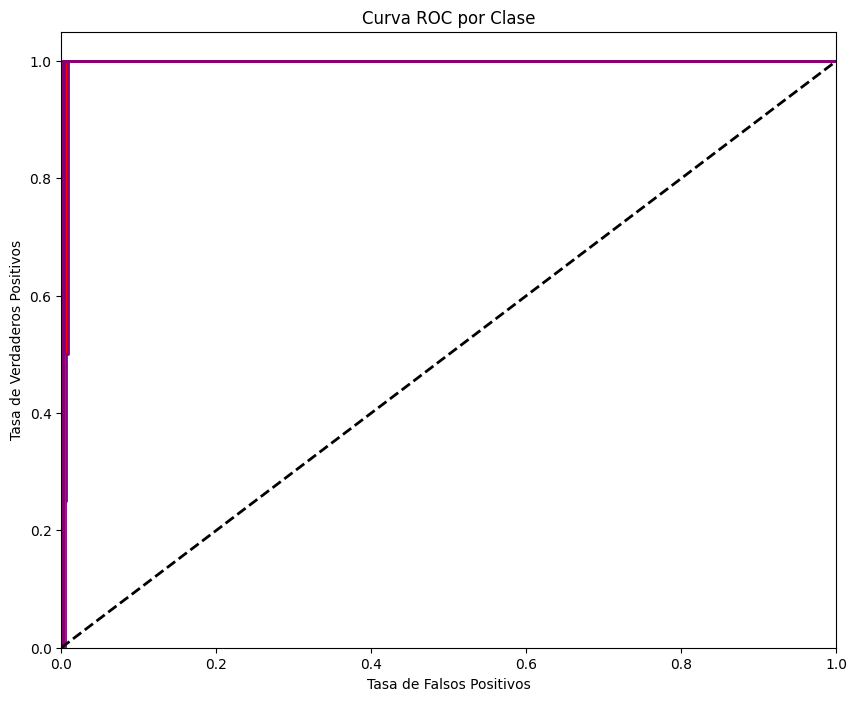

In [73]:
# Colores para cada clase
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])

plt.figure(figsize=(10, 8))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Clase {label_encoder_y.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC por Clase')
plt.show()
